### CONCURRENCIA 

La computación concurrente es una forma de computación en la cual varios cálculos se ejecutan simultáneamente en lugar de secuencialmente. Formalmente, la computación concurrente se define como una forma de computación donde las ejecuciones se producen en tiempos de ejecución solapados, esto es "concurrentemente", en vez de ejecutarse secuencialmente (uno completando su ejecución antes de que el siguiente empiece con la suya propia).
El principal problema de la programación concurrente corresponde a no saber en que orden se ejecutan los programas (no determisnitico). Se debe tener especial cuidado en que este orden no afecte el resultado de los programas.

Distintos lenguajes de programación estan diseñados para admitir la programación concurrente mediante el uso de subprocesos. Los objetos y recursos pueden ser accedidos por múltiples hilos; cada subproceso puede potencialmente acceder a cualquier objeto en el programa y el usuario debe garantizar que los accesos de lectura y escritura a los objetos estén correctamente sincronizados entre los subprocesos. 

Si los diferentes procesos de un programa concurrente tienen acceso a variables globales o secciones de memoria comunes, la transferencia de dato s a través de ella es una vía habitual de comunicación y sincronización entre ellos. Las primitivas para programación concurrente basada en memoria compartida resuelven los problemas de sincronización entre procesos y de exclusión mutua utilizando la semántica de acceso a memoria compartida.

### Hilos


Las interfaces de creación de hilos (también llamados por algunos autores hebras). En su forma más básica, dicha interfaz ofrece la posibilidad de crear hilos y esperar a que estos terminen. Los hilos reciben parámetros cuando son creados y devuelven un resultado una vez el código ha finalizado. Este tipo de de relación es similar a la que tiene un programa que ha sido lanzado desde el terminal con su creador. 
Una vez creados, cada hilo progresa de forma independiente al resto. Esto provoca que cada uno de los hilos pueda potencialmente viajar a una velocidad distinta, ejecutándose "concurrentemente" con el resto. Esto provoca que la ejecución de un programa sea diferente en cada da pasada y que sea independiente. 

### Ejercicio 

<b>1. Implementar un programa secuencial que calcule el producto de </b>


SOLUCIÓN 

Función de multiplicación de matrices

In [74]:
def multi_matriz(a,b,r):
    n=[]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(a[0])):
                r[i][j]+=(a[i][k]*b[k][j])
    return r

Funciones para creación de nuevas matrices a multiplicar y matriz con ceros para almacenar el resultado

In [66]:
def nueva_matriz(x,y):
    c=[]
    for i in range(x):
        c.append([])
        for j in range(y):
            c[i].append(random.randint(0,1))
    return c

def nueva_matriz_zeros(x,y):
    c=[]
    for i in range(x):
        c.append([])
        for j in range(y):
            c[i].append(0)
    return c


Implementación

In [291]:
import time
import random
import numpy as np

arrDinamico=[100,300,1000]
vector = 100
for vector in arrDinamico:
    t1 = time.time()
    p = nueva_matriz(vector,vector)
    q = nueva_matriz(vector,vector)
    r = nueva_matriz_zeros(vector,vector)
    r = multi_matriz(p,q,r)
    print(f"Matrices de {vector} x{ vector}")
    print(f"Fin de ejecución {time.time()- t1} seg. ")
    print(np.array(r))
    print()

Matrices de 100 x100
Fin de ejecución 0.16335129737854004 seg. 
[[25 19 27 ... 24 29 33]
 [18 20 23 ... 24 23 32]
 [23 21 24 ... 31 26 29]
 ...
 [29 29 31 ... 32 32 37]
 [26 24 28 ... 28 24 30]
 [24 24 29 ... 27 21 32]]

Matrices de 300 x300
Fin de ejecución 3.8831889629364014 seg. 
[[80 80 79 ... 74 75 79]
 [73 87 79 ... 82 84 90]
 [62 80 73 ... 76 75 74]
 ...
 [74 82 77 ... 73 71 71]
 [72 85 70 ... 82 73 81]
 [62 78 72 ... 74 72 78]]

Matrices de 1000 x1000
Fin de ejecución 154.40486907958984 seg. 
[[254 253 248 ... 263 264 253]
 [246 233 238 ... 251 235 242]
 [232 214 238 ... 240 242 247]
 ...
 [236 248 254 ... 258 259 250]
 [216 244 234 ... 243 256 247]
 [246 265 258 ... 270 267 265]]



<b>2. Refactorizar el código  y diseñar un algoritmo concurrente que utilice multi hilospara hacer la multiplicación de las matrices, cada hilo calculará  un subconjunto del procucto.</b>

SOLUCIÓN

Funciones para deficnición de subconjuntos para su multiplicación

In [292]:
def multi_sub_matriz(i,j):
    global productoMatriz
    s = 0
    subA=p[i]
    subB= [c[j] for c in q]
    reg_num=min(len(subA),len(subB))
    for y in range(reg_num):
        s += (subA[y] * subB[y])
    productoMatriz[i][j] += s
    

def genera_sub_matriz(rango,i,j,sentido):
    multi_sub_matriz(i,j)
    if sentido == "a-b" or sentido == 'ini':    
        if j == 0:
            k=1
        else:
            k = j+1 
        if k >= 0  and k != i  and i >= 0 and k > rango[1] and  k < (rango[1] + (base))and k <vector:
            genera_sub_matriz(rango,i,k,"a-b")
    if sentido == "w-v" or sentido == 'ini':  
        if i == 0:
            r=1
        else:
            r = j+1 
        r = i+1 
        if r >= 0 and r != j  and j >= 0 and r >rango[0] and  r < (rango[0] + (base) )and r <vector:
            genera_sub_matriz(rango,r,j,"w-v")
            
def inicia_subconjunto(a,b):
    s = a 
    t = b 
    for i in range(base):
        genera_sub_matriz([a,b],s,t,'ini')
        s += 1
        t += 1
        if s >= vector or  t >= vector :
            break;

def multi_matriz_hilos():
    global p
    global base
    global sub
    dim = len(p)
    x = list(range(1, dim))[::base]
    arrHilos=[]
    t = 0
    for u in x:
        for v in x:
            if v > 0:
                arrHilos.append(threading.Thread(target=inicia_subconjunto, args=(u-1,v-1)))
                t = v
    for thread in arrHilos:
        thread.start()
        thread.join()

In [293]:
import threading
import time
import random
import numpy as np
import math

arrDinamico=[100,300,1000]
arrBase = [1,2,4,8,16]
vector = 100
for vector in arrDinamico:
    for sub in  arrBase:
    
        t3 = time.time()
        p = nueva_matriz(vector,vector)
        q = nueva_matriz(vector,vector)
        productoMatriz = nueva_matriz_zeros(vector,vector)
        base=int(math.floor(vector/sub))
        multi_matriz_hilos()
        print(f"Matrices de {vector} x { vector} con {sub} hilos")
        print(f"Fin de ejecución {time.time()- t3} seg. ")
        print()
        t4 = time.time()


Matrices de 100 x 100 con 1 hilos
Fin de ejecución 0.1486659049987793 seg. 

Matrices de 100 x 100 con 2 hilos
Fin de ejecución 0.1315169334411621 seg. 

Matrices de 100 x 100 con 4 hilos
Fin de ejecución 0.1376512050628662 seg. 

Matrices de 100 x 100 con 8 hilos
Fin de ejecución 0.14161014556884766 seg. 

Matrices de 100 x 100 con 16 hilos
Fin de ejecución 0.16880512237548828 seg. 

Matrices de 300 x 300 con 1 hilos
Fin de ejecución 3.2579119205474854 seg. 

Matrices de 300 x 300 con 2 hilos
Fin de ejecución 3.2667958736419678 seg. 

Matrices de 300 x 300 con 4 hilos
Fin de ejecución 3.0803847312927246 seg. 

Matrices de 300 x 300 con 8 hilos
Fin de ejecución 3.1749234199523926 seg. 

Matrices de 300 x 300 con 16 hilos
Fin de ejecución 3.3702924251556396 seg. 

Matrices de 1000 x 1000 con 1 hilos
Fin de ejecución 122.26634621620178 seg. 

Matrices de 1000 x 1000 con 2 hilos
Fin de ejecución 122.12317299842834 seg. 

Matrices de 1000 x 1000 con 4 hilos
Fin de ejecución 124.40237450599

<b>3. Modifica la versión concurrente para hacer un analisis de rendimiento: spped-up, eficiencia, escalabilidad, incluir el procedimietno para elaborar el cómputo de los tiempos y medidas estadisticas que se calculen.

SOLUCIÓN

Para realizar un análisis de rendimiento utilizaremos la función timeit.timeit() de la biblioteca time que aporta, entre otras caracterirsticas el tiempo total de la ejecución de una función repetidas veces.

Continuamos con la implementacion de la función timeit() indicando la función para analizar y el número de repeticiones que se ejecutará.

In [294]:
import timeit

arrDinamico = [100,300,1000]
arrDatosSecuencial = []

for vector in arrDinamico:
    p = nueva_matriz(vector,vector)
    q = nueva_matriz(vector,vector)
    r = nueva_matriz_zeros(vector,vector)
    
    ts = timeit.timeit(f"multi_matriz({p},{q},{r})", globals = globals(),number = 5)
    print(f"Matrices de {vector} x{ vector}")
    print(f'Tiempo:: acumulado: {ts:10f} seg. || promedio: {ts/5:10f} seg.')
    
    arrDatosSecuencial.append(([vector,ts/5]))

Matrices de 100 x100
Tiempo:: acumulado:   0.670746 seg. || promedio:   0.134149 seg.
Matrices de 300 x300
Tiempo:: acumulado:  19.227874 seg. || promedio:   3.845575 seg.
Matrices de 1000 x1000
Tiempo:: acumulado: 781.129583 seg. || promedio: 156.225917 seg.


Los datos recabados de la ejecución secuencial se almacenaran en el arreglo arrDatosSecuencial[ ]

In [295]:
print(arrDatosSecuencial)

[[100, 0.1341492752006161], [300, 3.845574709599896], [1000, 156.22591668599927]]


Implementamos una fución analoga para recabar los datos de tiempo de ejecución del algoritmo concurrente

In [296]:
import threading
import time
import random
import numpy as np
import math

arrDinamico = [100,300,1000]
arrBase = [1,2,4,8,16]
vector = 100
arrDatosConcurrente = []
for vector in arrDinamico:
    for sub in  arrBase:
    
        t3 = time.time()
        
        p = nueva_matriz(vector,vector)
        q = nueva_matriz(vector,vector)
        productoMatriz = nueva_matriz_zeros(vector,vector)
        
        base = int(math.floor(vector/sub))
        
        print(f"Matrices de {vector} x { vector} con {sub} hilos")
        tp = timeit.timeit(f"multi_matriz_hilos()", globals = globals(),number = 5)
        print(f'Tiempo:: acumulado: {tp:10f} seg. || promedio: {tp/5:10f} seg.')
        
        arrDatosConcurrente.append(([vector,sub,tp/5]))
        print()


Matrices de 100 x 100 con 1 hilos
Tiempo:: acumulado:   0.587660 seg. || promedio:   0.117532 seg.

Matrices de 100 x 100 con 2 hilos
Tiempo:: acumulado:   0.583326 seg. || promedio:   0.116665 seg.

Matrices de 100 x 100 con 4 hilos
Tiempo:: acumulado:   0.601727 seg. || promedio:   0.120345 seg.

Matrices de 100 x 100 con 8 hilos
Tiempo:: acumulado:   0.640780 seg. || promedio:   0.128156 seg.

Matrices de 100 x 100 con 16 hilos
Tiempo:: acumulado:   0.743357 seg. || promedio:   0.148671 seg.

Matrices de 300 x 300 con 1 hilos
Tiempo:: acumulado:  16.343672 seg. || promedio:   3.268734 seg.

Matrices de 300 x 300 con 2 hilos
Tiempo:: acumulado:  15.844725 seg. || promedio:   3.168945 seg.

Matrices de 300 x 300 con 4 hilos
Tiempo:: acumulado:  15.996503 seg. || promedio:   3.199301 seg.

Matrices de 300 x 300 con 8 hilos
Tiempo:: acumulado:  16.142385 seg. || promedio:   3.228477 seg.

Matrices de 300 x 300 con 16 hilos
Tiempo:: acumulado:  15.897780 seg. || promedio:   3.179556 seg.

Los datos recabados de la ejecución secuencial se almacenaran en el arreglo arrDatosConcurrentes, para el calculo de metricas de eficiencia utilizaremos el tiempo promedio de las cinco repeticiones.

In [297]:
print(arrDatosConcurrente)

[[100, 1, 0.11753202839900041], [100, 2, 0.11666520879953168], [100, 4, 0.12034533900005044], [100, 8, 0.12815601939946647], [100, 16, 0.1486714333994314], [300, 1, 3.268734477799444], [300, 2, 3.1689450331992703], [300, 4, 3.199300592999498], [300, 8, 3.228477058200224], [300, 16, 3.1795559010002763], [1000, 1, 122.31189308780013], [1000, 2, 123.79800668639946], [1000, 4, 123.2846680083996], [1000, 8, 120.32663290339988], [1000, 16, 124.5348698656002]]


Continuamos con el calculo de los de metricas de rendimiento recabados en la ejecución de la multiplicación de matrices de forma secuencial y concurrente

In [299]:
arrMetricas = []
dicVector = {100 : arrDatosSecuencial[0], 300 : arrDatosSecuencial[1], 1000: arrDatosSecuencial[2]}
dicHilos= {'nombre' : 'Carlos', 'edad' : 22, 'cursos': ['Python','Django','JavaScript'] }
arrBase = [1,2,4,8,16]
dicMetricas = {}

for val in arrDatosConcurrente:
    speedUp = round(float(dicVector[val[0]][1])/float(val[2]),4)
    eficiencia = round(float(dicVector[val[0]][1]) / (float(val[1] * val[2] )),4)
    print(f"Para matrices de {val[0]} x {val[0]} con {val[1]} hilos:    Speed-up {speedUp:f} || Eficiencia {eficiencia:f} ")
    
    dicMetricas[f"{val[0]}-{val[1]}"]=[val[0],val[1],speedUp,eficiencia]
    arrMetricas.append([float(speedUp),float(eficiencia)])
columnSpeed100 = [c[2]  for c in dicMetricas.values() if c[0]==100]
columnEfic100 = [c[3]  for c in dicMetricas.values() if c[0]==100]
columnSpeed300 = [c[2]  for c in dicMetricas.values() if c[0]==300]
columnEfic300 = [c[3]  for c in dicMetricas.values() if c[0]==300]
columnSpeed1000 = [c[2]  for c in dicMetricas.values() if c[0]==1000]
columnEfic1000 = [c[3]  for c in dicMetricas.values() if c[0]==1000]



Para matrices de 100 x 100 con 1 hilos:    Speed-up 1.141400 || Eficiencia 1.141400 
Para matrices de 100 x 100 con 2 hilos:    Speed-up 1.149900 || Eficiencia 0.574900 
Para matrices de 100 x 100 con 4 hilos:    Speed-up 1.114700 || Eficiencia 0.278700 
Para matrices de 100 x 100 con 8 hilos:    Speed-up 1.046800 || Eficiencia 0.130800 
Para matrices de 100 x 100 con 16 hilos:    Speed-up 0.902300 || Eficiencia 0.056400 
Para matrices de 300 x 300 con 1 hilos:    Speed-up 1.176500 || Eficiencia 1.176500 
Para matrices de 300 x 300 con 2 hilos:    Speed-up 1.213500 || Eficiencia 0.606800 
Para matrices de 300 x 300 con 4 hilos:    Speed-up 1.202000 || Eficiencia 0.300500 
Para matrices de 300 x 300 con 8 hilos:    Speed-up 1.191100 || Eficiencia 0.148900 
Para matrices de 300 x 300 con 16 hilos:    Speed-up 1.209500 || Eficiencia 0.075600 
Para matrices de 1000 x 1000 con 1 hilos:    Speed-up 1.277300 || Eficiencia 1.277300 
Para matrices de 1000 x 1000 con 2 hilos:    Speed-up 1.26190

<b>Cálculo de Speed-up y eficiencia</b>

In [300]:
import pandas as pd


tabla = pd.DataFrame(data = [columnSpeed,columnEfic100],
                      columns = [1,2,4,8,16],
                    index = ["S","E = S/p"])
print("Tabla de eficiencia para la multiplicación de matrices de 100 x 100")
tabla


Tabla de eficiencia para la multiplicación de matrices de 100 x 100


,1,2,4,8,16
S,1.1385,1.1401,1.1264,1.0575,0.9419
E = S/p,1.1414,0.5749,0.2787,0.1308,0.0564


In [301]:

tablaT = pd.DataFrame(data = [columnSpeed100,columnEfic100,columnSpeed300,columnEfic300,columnSpeed1000,columnEfic1000],
                     columns = [1,2,4,8,16],
                    index = ["100 - S","100 - E","300 - S","300 - E","1000 - S","1000 - E"])
print("Tabla de eficiencia para la multiplicación de todas las matrices ")
tablaT

Tabla de eficiencia para la multiplicación de todas las matrices 


,1,2,4,8,16
100 - S,1.1414,1.1499,1.1147,1.0468,0.9023
100 - E,1.1414,0.5749,0.2787,0.1308,0.0564
300 - S,1.1765,1.2135,1.2020,1.1911,1.2095
300 - E,1.1765,0.6068,0.3005,0.1489,0.0756
1000 - S,1.2773,1.2619,1.2672,1.2983,1.2545
1000 - E,1.2773,0.6310,0.3168,0.1623,0.0784


<b>Gráfico de Speed-up</b>

Speed up para un programa concurrente con diferente tamaño
en la entrada

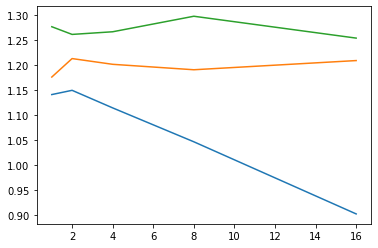

In [303]:
import matplotlib.pyplot as plt
x = [1,2,4,8,16]
y100 = columnSpeed100
y300 = columnSpeed300
y1000 = columnSpeed1000
plt.plot(x,y100)
plt.plot(x,y300)
plt.plot(x,y1000)
plt.show()


<b>Gráfico de eficiencia</b>

Eficiencia para un programa concurrente con diferente tamaño
en la entrada

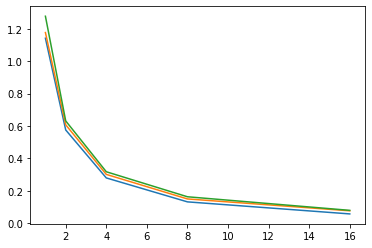

In [304]:
import matplotlib.pyplot as plt
x = [1,2,4,8,16]
y100 = columnEfic100
y300 = columnEfic300
y1000 = columnEfic1000
plt.plot(x,y100)
plt.plot(x,y300)
plt.plot(x,y1000)
plt.show()

### Conclusiones

Teniendo en cuenta la presencia del lenguaje Python en la implementación de proyectos de
computo cientifico, sabemos que ofrece muchas herramientas que facilita la realización de tareas orientadas
a esta área. Pero tambien sabemos que muchas de estas herramientas que ofrece el lenguaje estan basadas
en otros lenguajes de programación compilados que complementan las limitaciones de Python debido a su
naturaleza de lenguaje interpretado. Si bien la refactorización de una tarea utilizando hilos (threads) beneficia
el rendimiento y la ejecución de un programa, esta tambien depende del lenguaje de programación y su
velocidad de respueta, como en este caso que el lenguaje Python por si solo no da el rendimiento que
se desearía en la ejecución de un problema aritmético relativamente sencillo como es la multiplicación de
matrices.